In [55]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
sample_data = pd.read_csv('AdSpent.csv')
sample_data

,Division,Calendar_Week,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Overall_Views,Sales
0,A,1/6/2018,392,422,408,3.498950e+05,73580,12072,682,59417
1,A,1/13/2018,787,904,110,5.062702e+05,11804,9499,853,56806
2,A,1/20/2018,81,970,742,4.300422e+05,52232,17048,759,48715
3,A,1/27/2018,25,575,65,4.177457e+05,78640,10207,942,72047
4,A,2/3/2018,565,284,295,4.085058e+05,40561,5834,658,56235
...,...,...,...,...,...,...,...,...,...,...
3046,Z,2/1/2020,29239,25311,622406,1.459071e+06,45026,12098,53667,82707
3047,Z,2/8/2020,26230,28031,624409,5.342505e+05,227070,9548,53665,84503
3048,Z,2/15/2020,24749,31281,439362,4.227182e+05,393685,9861,55561,147325
3049,Z,2/22/2020,20713,30356,464178,6.085799e+05,424676,10221,49221,111525


In [61]:
def DataPreProcessing(df):
    # select only required columns
    df = df.loc[:, ['Calendar_Week', 'Sales']]
    # renaming the columns for prophet
    df = df.rename(columns = {'Calendar_Week': 'ds',
                                            'Sales': 'y'})
    # convert object to datetime
    df['ds'] = pd.to_datetime(df['ds'])
    # make the datetime as index
    df.index = df['ds']
    return df

def SplitData(df):
    # split to training and testing
    training_data = df[:'2020-01-31']
    testing_data = df['2020-02-01':]
    return training_data, testing_data


def SimpleModel(training_data):
    # interval width sets the uncertainity interval to produce a condidence 
    # interval around the forecast
    model_1 = Prophet(interval_width=0.95)
    model_1.fit(training_data)
    future = model_1.make_future_dataframe(periods=33)
    forecast = model_1.predict(future)
    return forecast, model_1

In [58]:
processed_df = DataPreProcessing(sample_data)
processed_df

,ds,y
ds,,
2018-01-06,2018-01-06,59417
2018-01-13,2018-01-13,56806
2018-01-20,2018-01-20,48715
2018-01-27,2018-01-27,72047
2018-02-03,2018-02-03,56235
...,...,...
2020-02-01,2020-02-01,82707
2020-02-08,2020-02-08,84503
2020-02-15,2020-02-15,147325


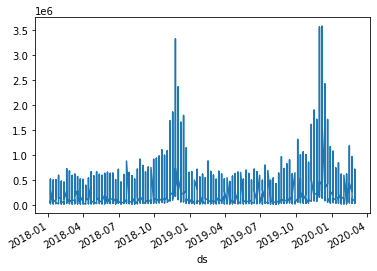

In [59]:
processed_df['y'].plot()

* Here we can observe seasonal fluctuations, like more sales in the late december and early january, hence will use an additive model

In [62]:
training_data, testing_data = SplitData(processed_df)
forecast, model_1 = SimpleModel(training_data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


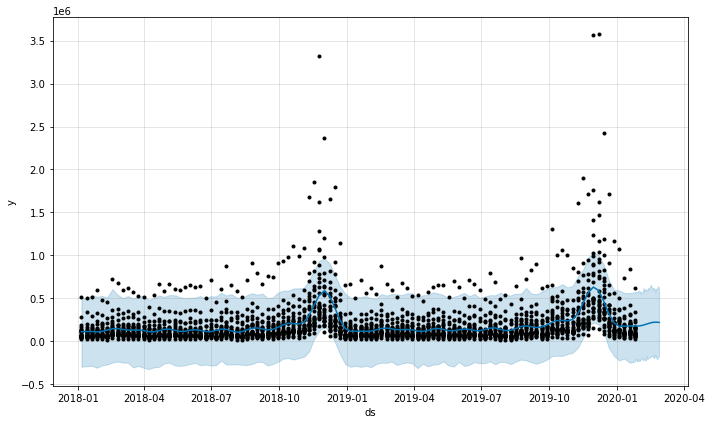

In [65]:
fig_1 = model_1.plot(forecast)